<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/%EC%9D%B4%EA%B2%B8%ED%9D%ACtest/EX_02_2_png_predict_CNN_MNIST_3_Conv_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 기반 Classification

### [예제 2] MNIST-Classifier by CNN: 3 Convolution Layer

>### Load modules

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.24.0
TensorFlow Version :2.11.0
Matplotlib Version :3.6.2


> ### Load MNIST Data

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.astype(np.float32)
train_data = np.expand_dims(train_data, axis=-1)
train_data = train_data / 255.0

test_data = test_data.astype(np.float32)
test_data = np.expand_dims(test_data, axis=-1)
test_data = test_data / 255.0

>### Create Model


In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='sigmoid',input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='sigmoid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',activation='sigmoid'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

>### 결과 출력을 위한 함수

In [ ]:
def Make_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5,idx%5].imshow(data[idx].reshape((28,28)),cmap="binary")
        ax_result[idx//5,idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### 학습 전 상황

313/313 [==============================] - 2s 6ms/step


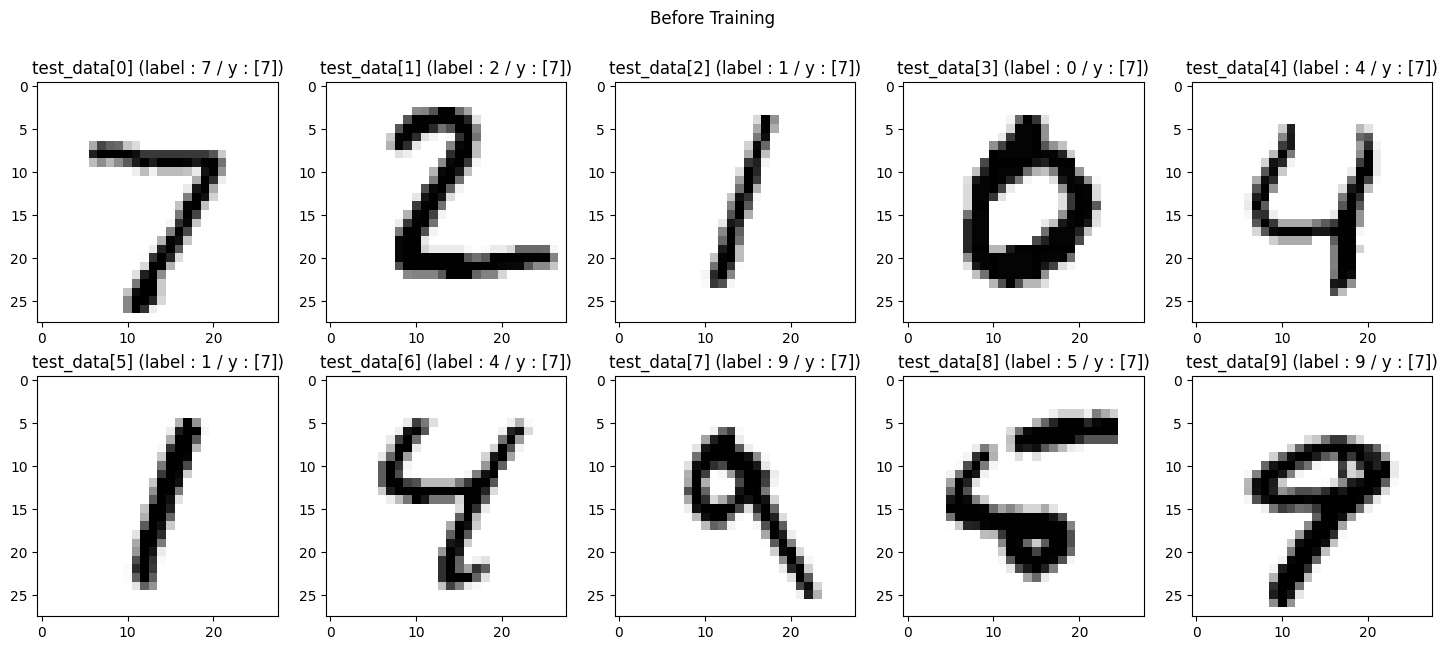

In [ ]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("Before Training", test_data, test_labels, y_max)

> ### 학습 (Training)

In [ ]:
%%time
history = model.fit(train_data, train_labels, epochs=10, 
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.6748 - accuracy: 0.7702 - val_loss: 0.1237 - val_accuracy: 0.9628
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1010 - accuracy: 0.9703 - val_loss: 0.0651 - val_accuracy: 0.9801
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0651 - accuracy: 0.9804 - val_loss: 0.0633 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0492 - accuracy: 0.9852 - val_loss: 0.0392 - val_accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0395 - accuracy: 0.9881 - val_loss: 0.0412 - val_accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0352 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0368 -

> ### Ploting : Cost/Training Count

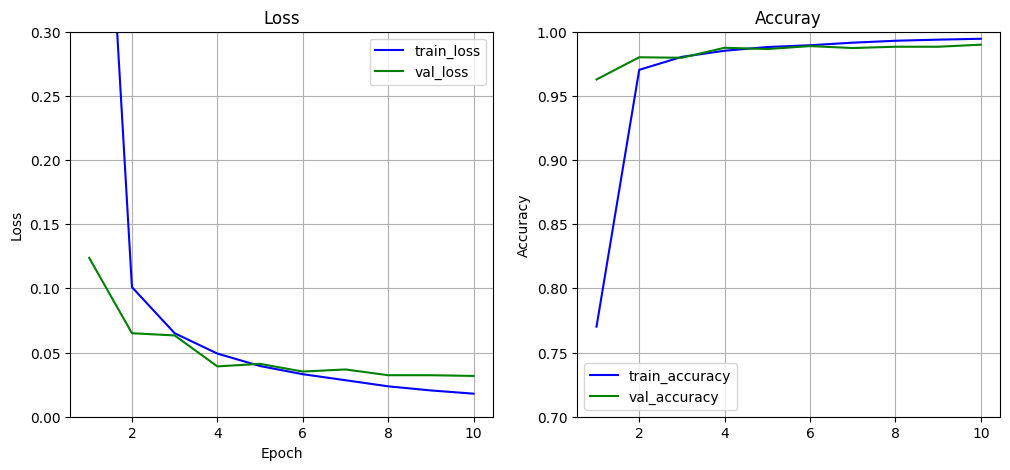

In [ ]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,0.3])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

> ### Training 이후

313/313 [==============================] - 2s 6ms/step


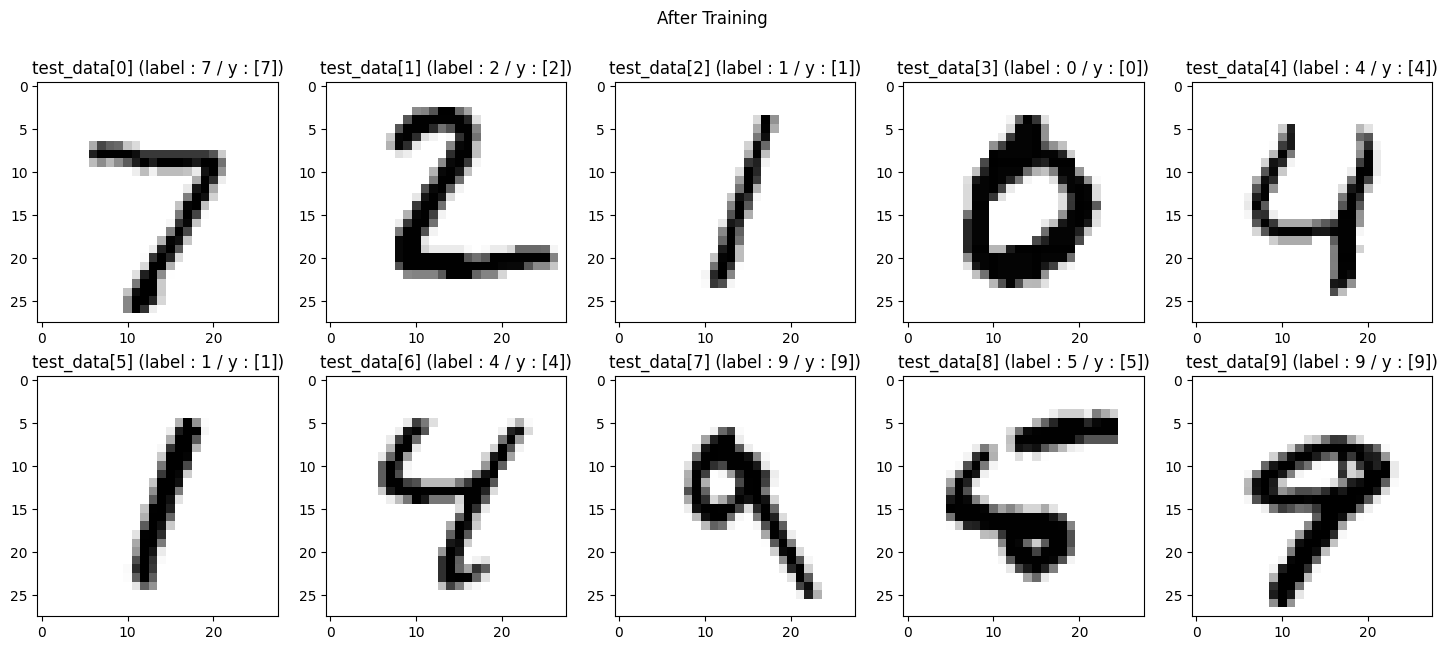

In [ ]:
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
Make_Result_Plot("After Training", test_data, test_labels, y_max)

In [ ]:
def square(imgs, n): # n x n 개의 그림 그리는 함수
    plt.figure(figsize=(10,10))
    for i in range(n):
        for j in range(n):
            p_num = i * n + j         
            ax = plt.subplot(n, n, p_num+1)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(imgs[0, :, :, p_num], cmap='gray')
    plt.show()

1/1 [==============================] - 0s 107ms/step
(1, 14, 14, 64) (1, 7, 7, 64) (1, 3, 3, 64)


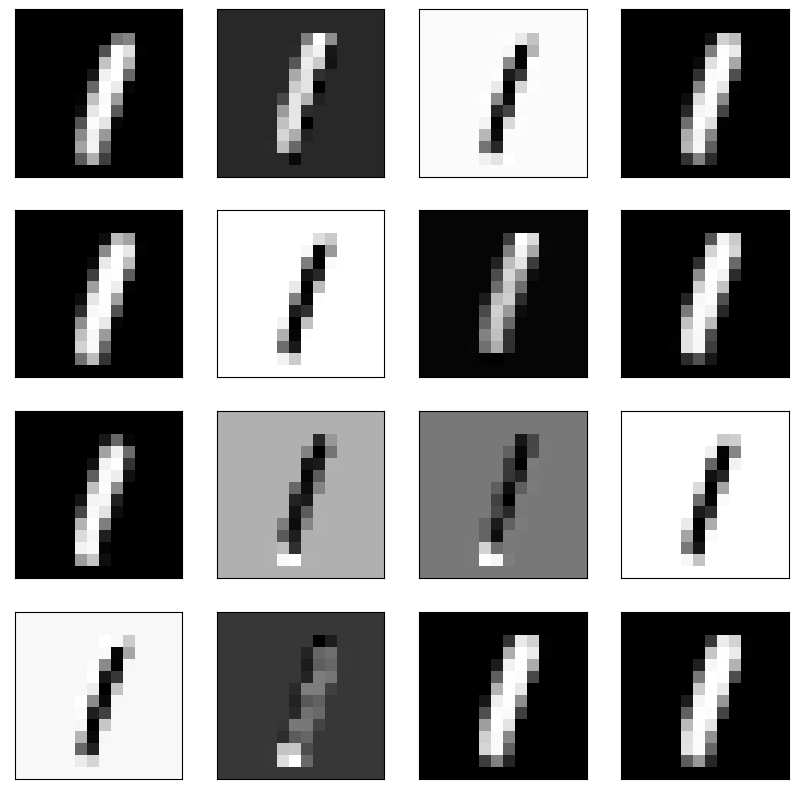

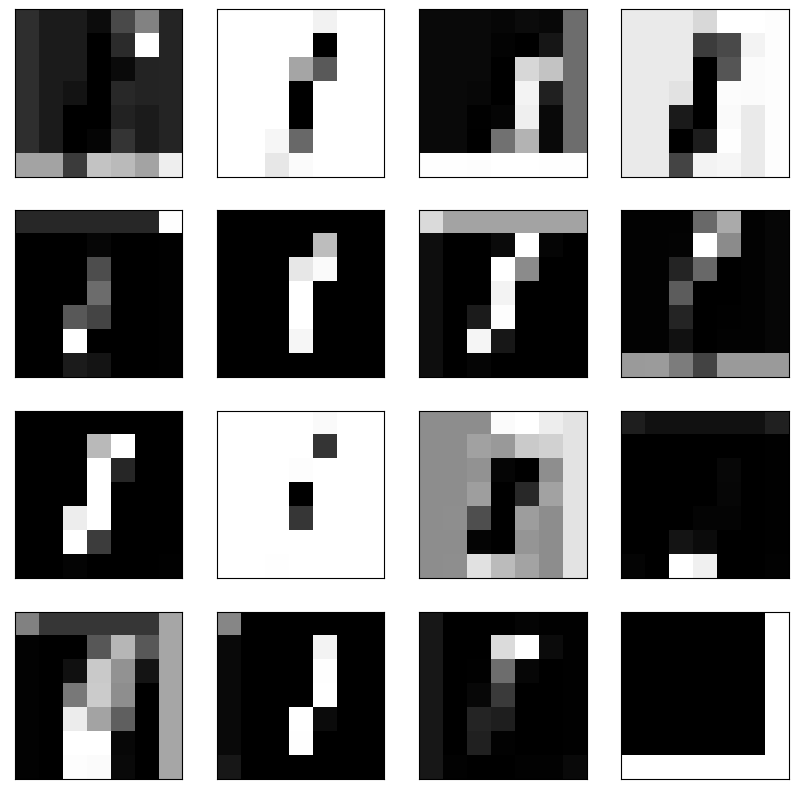

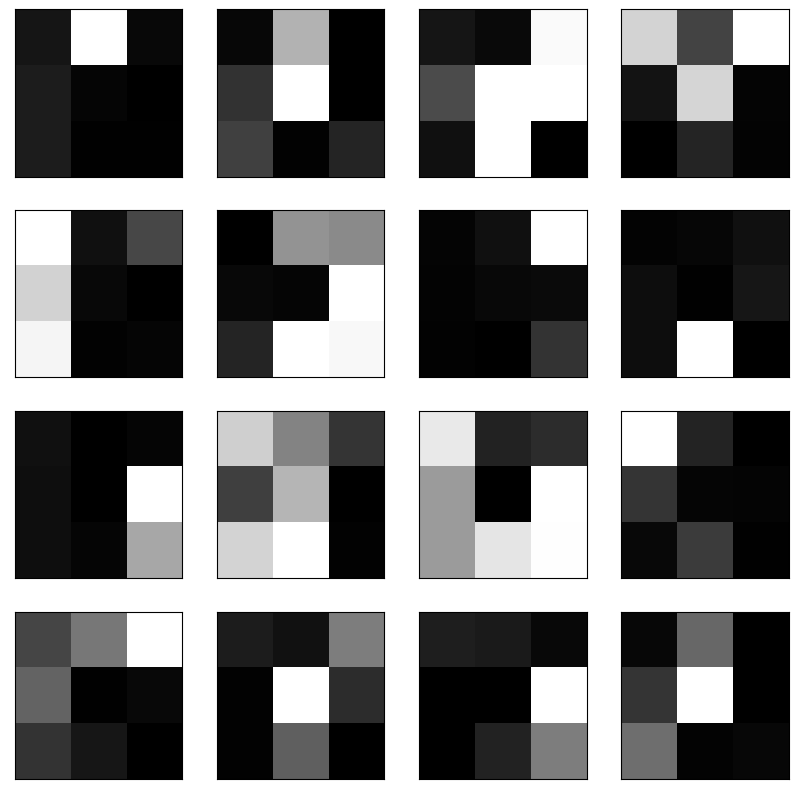

In [ ]:
ixs = [1, 3, 5]
outputs = [model.layers[i].output for i in ixs] # 다수의 output 설정
# print(outputs)
model_fm = tf.keras.models.Model(inputs=model.inputs, outputs=outputs) # 새로운 모델 생성: input은 동일, output은 다수
# model_fm.summary()
feature_maps = model_fm.predict(test_data[5:6]) # 모델을 돌려 다수의 출력을 저장
print(feature_maps[0].shape, feature_maps[1].shape, feature_maps[2].shape)
# layers_names = model_fm.output_names # output의 이름을 저장
# # feature_maps[0].shape

for i, fmap in enumerate(feature_maps): # output을 하나씩 그려줌, output은 곧 Feature map, 8x8=64개 채널만 그려줌
#     print(layers_names[i])
    square(fmap, 4)

313/313 [==============================] - 2s 6ms/step


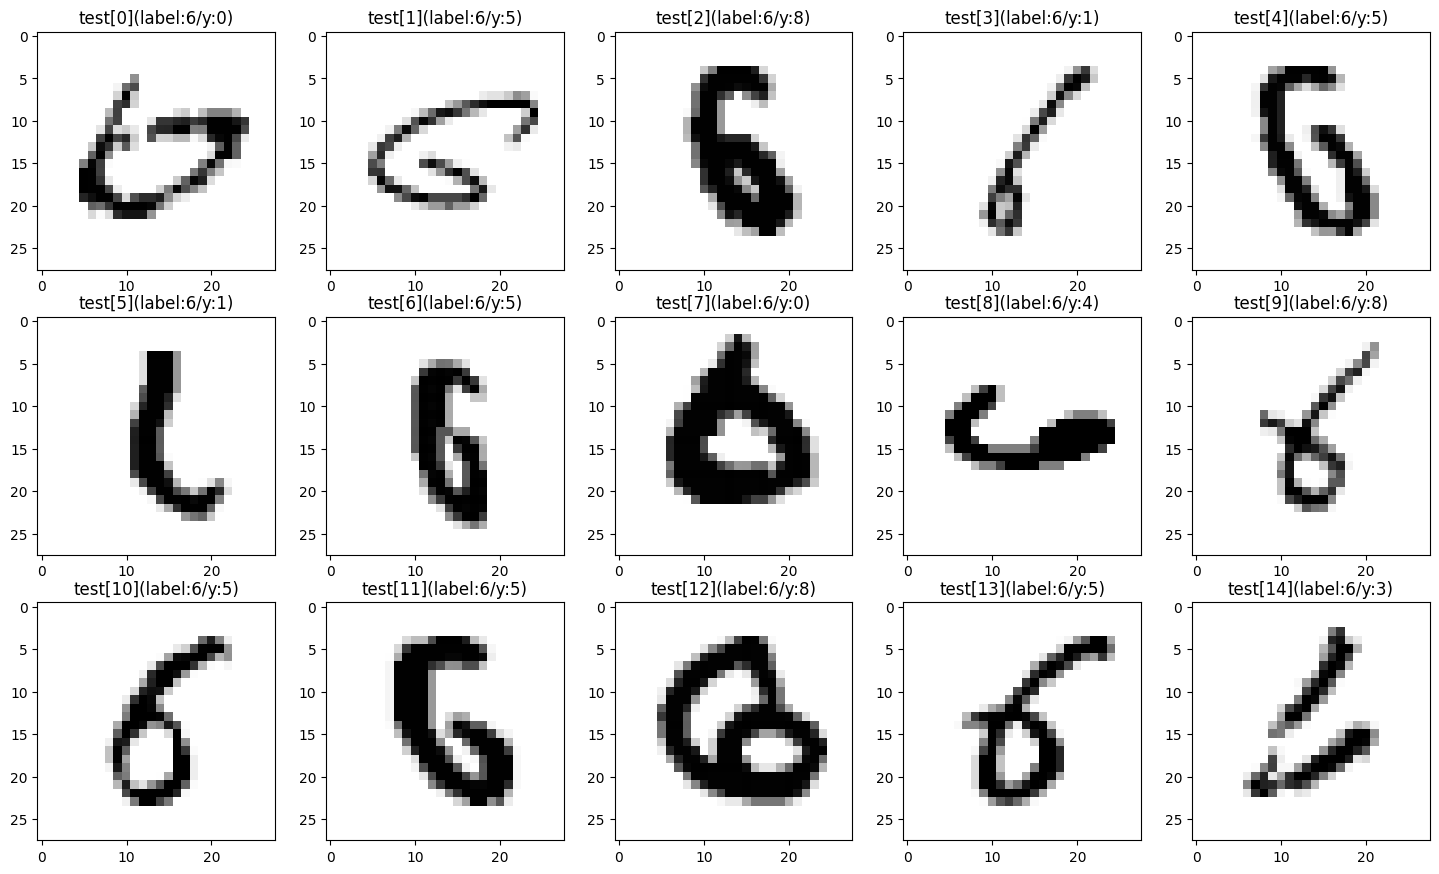

In [ ]:
# [1] 맞추지 못한 그림 표시하기 (label, h_x 같이 표시)

# 예측후 예측이 틀린그림 찾기 : boolean indexing 참조
y_out = model.predict(test_data)
y_max = np.argmax(y_out, axis=1)
idx = (y_max != test_labels) & (test_labels == 6)

imgs = test_data[idx]   # 맞추지못한 숫자이미지
lab = test_labels[idx]  # 맞추지못한 정답
y_h = y_max[idx]        # 맞추지못한 예측값
n_row = (len(imgs)-1)//5 + 1 # 5열씩 출력할 행의 수

fig_result, ax_result = plt.subplots(n_row, 5, figsize=(18, 3.5*n_row))
for i in range(len(imgs)):
    ax_result[i//5,i%5].imshow(imgs[i].reshape((28,28)),cmap="binary")
    ax_result[i//5,i%5].set_title("test[{}](label:{}/y:{})".format(i, lab[i], y_h[i]))


# # 틀린 그림 찾은 경우, 그림, label, 예측값 표시
# def Make_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
#     fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
#     fig_result.suptitle(suptitle)
#     for idx in range(10):
#         ax_result[idx//5,idx%5].imshow(data[idx].reshape((28,28)),cmap="binary")
#         ax_result[idx//5,idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

In [ ]:
import cv2

1/1 [==============================] - 0s 37ms/step
1


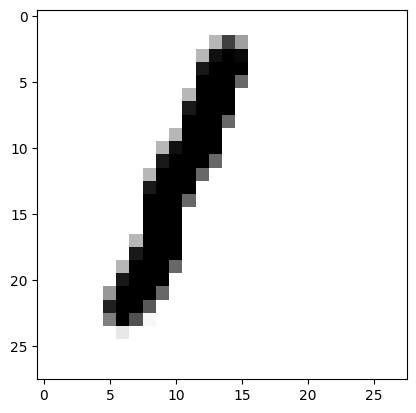

In [ ]:
# [2] 직접 그린 숫자(1) 그림파일() 인식: CNN <-> dense 모델 비교
# 1) png 그림파일 읽어서 predict에 넣을 값으로 변환
file = '../files/num1.png'
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
img1 = img.reshape(-1,28,28,1)  # model에 넣을 수 있는 (N, H, W, ch)로 변환
img2 = 1 - img1/255
plt.imshow(img2.reshape(28,28), cmap="binary")
# test_data[0]  # 동작이 안될경우 기존 모델의 데이터와 비교해보세요!!
# plt.imshow(test_data[0], cmap="binary")

# 2) model.predict로 예측
y_h = model.predict(img2)
y_max = np.argmax(y_h, axis=-1)
print(y_max[0])